In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
print(train_df.shape, test_df.shape)


(1168, 81) (292, 80)


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [96]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    251 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          21 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [97]:
rows_with_poolqc = train_df[train_df['PoolQC'].notna()]
poolqc_and_price = rows_with_poolqc[['PoolArea', 'PoolQC', 'SalePrice']]
print(poolqc_and_price)

     PoolArea PoolQC  SalePrice
64        480     Gd     160000
107       512     Ex     235000
174       738     Gd     274970
647       555     Ex     745000
670       648     Fa     181000
777       519     Fa     250000


In [98]:
rows_with_misc = train_df[train_df['MiscFeature'].notna()]
misc_and_price = rows_with_misc[['MiscFeature', 'SalePrice']]
print(misc_and_price)

     MiscFeature  SalePrice
4           Shed     122900
12          Shed     168500
35          Shed      76500
65          Shed     116050
84          Shed     266500
100         Shed     130000
102         Shed     128950
106         Shed     148000
151         Shed     148000
170         Shed      83000
182         Shed     170000
215         Gar2     151500
242         Shed     160000
270         Shed     277000
274         Shed      81000
282         Shed     161750
286         Othr      55000
326         Shed      79500
389         Shed     228950
399         Shed     256000
426         Shed     143000
433         Shed     131400
445         Shed     140000
482         Shed      88000
510         Shed     163000
520         Shed      55993
524         Othr     133000
528         Shed     144000
584         Shed     129000
596         Shed      90000
598         Shed     185000
600         Shed     106500
624         Shed     202500
657         Shed     157900
668         Shed    

In [99]:
rows_with_Alley = train_df[train_df['Alley'].notna()]
Alley_and_price = rows_with_Alley[['Alley', 'SalePrice']]
print(Alley_and_price)

     Alley  SalePrice
18    Pave     214500
61    Pave     163000
75    Grvl     115000
78    Pave     171900
92    Grvl      73000
...    ...        ...
1070  Pave     197000
1074  Pave     122000
1091  Pave     176000
1103  Grvl     136000
1143  Grvl     157500

[70 rows x 2 columns]


In [100]:
house_df = train_df.copy()

In [101]:
house_df.drop(['Id','PoolQC' , 'PoolArea', 'MiscFeature', 'Alley'], axis=1 , inplace=True)

In [102]:
# MSSubClass를 문자열로 변환하여 OHE
house_df['MSSubClass'] = house_df['MSSubClass'].astype(str)

# MSSubClass와 MSZoning에 OHE
house_df = pd.get_dummies(house_df, columns=['MSSubClass', 'MSZoning'], drop_first=True)

In [103]:
# 결측치를 Neighborhood의 중앙값으로 대체
house_df['LotFrontage'] = house_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# 로그 1p 변환 적용
house_df['LotFrontage_Log'] = np.log1p(house_df['LotFrontage'])

# 원본 칼럼 삭제
house_df = house_df.drop('LotFrontage', axis=1, errors='ignore')

In [104]:
# 로그 1p 변환 적용
house_df['LotArea_Log'] = np.log1p(house_df['LotArea'])

# 원본 칼럼 삭제
house_df = house_df.drop('LotArea', axis=1, errors='ignore')

In [105]:
# Pave에 1, Grvl에 0을 부여하는 이진 인코딩 적용
street_map = {'Pave': 1, 'Grvl': 0}
house_df['Street_Enc'] = house_df['Street'].map(street_map).fillna(1) # NaN은 Pave로 가정하여 1

# 원본 칼럼 삭제
house_df = house_df.drop('Street', axis=1, errors='ignore')

In [106]:

# LotShape 1~4점 척도
lot_shape_map = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 4}
house_df['LotShape_Enc'] = house_df['LotShape'].map(lot_shape_map).fillna(4)

# LandSlope 1~3점 척도
land_slope_map = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 3}
house_df['LandSlope_Enc'] = house_df['LandSlope'].map(land_slope_map).fillna(3)


house_df['LandContour'] = house_df['LandContour'].fillna('Unknown')
house_df['LotConfig'] = house_df['LotConfig'].fillna('Unknown')

house_df = pd.get_dummies(house_df, columns=['LandContour', 'LotConfig'], drop_first=True)

house_df['Is_AllPub'] = house_df['Utilities'].apply(lambda x: 1 if x == 'AllPub' else 0)


#  원본 칼럼 삭제
columns_to_drop = [
    'LotShape',
    'LandSlope',
    'Utilities'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [107]:
print(house_df['Condition1'].value_counts(dropna=False))

Condition1
Norm      1005
Feedr       63
Artery      37
RRAn        20
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


In [108]:
print(house_df['Condition2'].value_counts(dropna=False))

Condition2
Norm      1157
Feedr        3
PosN         2
Artery       2
PosA         1
RRAe         1
RRAn         1
RRNn         1
Name: count, dtype: int64


In [109]:
# 네 가지 명목형 특성에 대해 결측치 처리 후 OHE 적용

# 1. Neighborhood (주변 지역) - OHE 적용
house_df['Neighborhood'] = house_df['Neighborhood'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['Neighborhood'], prefix='Neighborhood', drop_first=True)

# 2. Condition1 (주요 근접도) - OHE 적용
house_df['Condition1'] = house_df['Condition1'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['Condition1'], prefix='Condition1', drop_first=True)

# 3. Condition2 (두 번째 근접도) - 삭제
# 극도로 희소하므로 특성으로 변환하지 않고 삭제
house_df = house_df.drop('Condition2', axis=1, errors='ignore')

# 4. BldgType (건물 유형) - OHE 적용
house_df['BldgType'] = house_df['BldgType'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['BldgType'], prefix='BldgType', drop_first=True)


In [110]:
# 1. OverallQual 로그 변환
house_df['OverallQual_Log'] = np.log1p(house_df['OverallQual'])

# 2. OverallCond 로그 변환
house_df['OverallCond_Log'] = np.log1p(house_df['OverallCond'])

# 3. 원본 칼럼 삭제
house_df = house_df.drop(['OverallQual', 'OverallCond'], axis=1, errors='ignore')


In [111]:
rows_with_MasV = train_df[train_df['MasVnrType'].notna()]
MasV_and_price = rows_with_MasV[['MasVnrType', 'SalePrice']]
print(MasV_and_price)

     MasVnrType  SalePrice
0       BrkFace     135000
2       BrkFace     176000
3       BrkFace     318000
7         Stone     241000
9       BrkFace     284000
...         ...        ...
1160    BrkFace     106000
1161    BrkFace     260000
1162    BrkFace     149900
1165    BrkFace     272000
1166    BrkFace     274000

[474 rows x 2 columns]


In [112]:
print(house_df['MasVnrType'].value_counts(dropna=False))

MasVnrType
NaN        694
BrkFace    359
Stone      104
BrkCmn      11
Name: count, dtype: int64


In [113]:
# 1. 문자열 범주에 대한 매핑 딕셔너리 정의 (NaN=0을 제외한 점수)
string_to_score_map = {
    'Stone': 2,
    'BrkFace': 1,
    'BrkCmn': 1,
}

# 2. NaN 값을 먼저 0으로 채우기
house_df['MasVnrType_Encoded'] = house_df['MasVnrType'].fillna(0)

# 3. 나머지 문자열 값들을 정의된 딕셔너리에 따라 숫자로 대체
house_df['MasVnrType_Encoded'] = house_df['MasVnrType_Encoded'].replace(string_to_score_map)


# 4. 결과 확인
print("MasVnrType_Encoded 값별 개수:")
print(house_df['MasVnrType_Encoded'].value_counts())


MasVnrType_Encoded 값별 개수:
MasVnrType_Encoded
0    694
1    370
2    104
Name: count, dtype: int64


In [114]:
house_df['MasVnrArea'] = house_df['MasVnrArea'].fillna(0)

In [115]:
# 1. MasVnrArea를 로그 변환
house_df['MasVnrArea_Log'] = np.log1p(house_df['MasVnrArea'])

# 2. 로그 변환된 면적과 인코딩된 유형 점수를 곱하여 최종 점수 생성
house_df['MasVnrScore'] = house_df['MasVnrArea_Log'] * house_df['MasVnrType_Encoded']

# 결과 확인
print(house_df[['MasVnrArea', 'MasVnrArea_Log', 'MasVnrType_Encoded', 'MasVnrScore']].head(10))

   MasVnrArea  MasVnrArea_Log  MasVnrType_Encoded  MasVnrScore
0       151.0        5.023881                   1     5.023881
1         0.0        0.000000                   0     0.000000
2        72.0        4.290459                   1     4.290459
3       254.0        5.541264                   1     5.541264
4         0.0        0.000000                   0     0.000000
5         0.0        0.000000                   0     0.000000
6         0.0        0.000000                   0     0.000000
7       100.0        4.615121                   2     9.230241
8         0.0        0.000000                   0     0.000000
9       292.0        5.680173                   1     5.680173


In [116]:
columns_to_drop = [
    'MasVnrArea',
    'MasVnrArea_Log',
    'MasVnrType',
    'MasVnrType_Encoded'
]

house_df = house_df.drop(columns_to_drop, axis=1)

In [117]:
print(house_df['Exterior1st'].value_counts())

Exterior1st
VinylSd    403
HdBoard    188
Wd Sdng    173
MetalSd    167
Plywood     82
CemntBd     54
BrkFace     39
WdShing     22
Stucco      19
AsbShng     15
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
CBlock       1
Name: count, dtype: int64


In [118]:
print(house_df['Exterior2nd'].value_counts())

Exterior2nd
VinylSd    395
HdBoard    174
MetalSd    162
Wd Sdng    161
Plywood    108
CmentBd     52
Wd Shng     34
BrkFace     22
Stucco      22
AsbShng     16
ImStucc      9
Brk Cmn      5
AsphShn      3
Stone        3
CBlock       1
Other        1
Name: count, dtype: int64


In [119]:
print(house_df['ExterQual'].value_counts())

ExterQual
TA    715
Gd    398
Ex     44
Fa     11
Name: count, dtype: int64


In [120]:
print(house_df['ExterCond'].value_counts())

ExterCond
TA    1019
Gd     120
Fa      25
Ex       3
Po       1
Name: count, dtype: int64


In [121]:
# 1. 3점 척도로 재정의된 매핑 딕셔너리 정의
exterior_simple_map = {
    # Score 3: Premium/Brick/Durable
    'Stone': 3, 'CemntBd': 3, 'BrkFace': 3, 'BrkComm': 3,

    # Score 2: Mid-range Wood/Engineered
    'Plywood': 2, 'HdBoard': 2, 'Wd Sdng': 2, 'WdShing': 2,

    # Score 1: Common/Low Quality
    'VinylSd': 1, 'MetalSd': 1, 'Stucco': 1, 'ImStucc': 1,
    'AsbShng': 1, 'AsphShn': 1, 'CBlock': 1,

    # NaN은 최저점 1로 매핑
    np.nan: 1
}

# 1-2. ExterQual/ExterCond 5점 척도 매핑 (품질/상태)
qual_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 3}

# --- 2. 면적 처리 ---
# 1층 면적과 2층 면적을 더하여 총 지상 면적(TotalLivingArea) 생성
house_df['TotalLivingArea'] = house_df['1stFlrSF'] + house_df['2ndFlrSF']
# 로그 1p 변환 적용
house_df['TotalLivingArea_Log'] = np.log1p(house_df['TotalLivingArea'])


# --- 3. 외장재 유형 점수 (ExteriorScore) 생성 ---
# 3-1. 1st, 2nd 모두 3점 척도로 인코딩 및 합산
house_df['Ext1_Enc'] = house_df['Exterior1st'].map(exterior_simple_map).fillna(1)
house_df['Ext2_Enc'] = house_df['Exterior2nd'].map(exterior_simple_map).fillna(1)
house_df['ExteriorQualityScore_Type'] = house_df['Ext1_Enc'] + house_df['Ext2_Enc']

# 3-2. ExteriorScore = 로그 면적 * 외장재 유형 합산 점수
house_df['ExteriorScore'] = house_df['TotalLivingArea_Log'] * house_df['ExteriorQualityScore_Type']

# --- 4. 최종 점수 가중치 부여 및 안정화 ---
# 4-1. ExterQual/ExterCond 인코딩 및 합산 (가중치)
house_df['ExterQual_Enc'] = house_df['ExterQual'].map(qual_cond_map).fillna(3)
house_df['ExterCond_Enc'] = house_df['ExterCond'].map(qual_cond_map).fillna(3)
house_df['ExterTotalQuality'] = house_df['ExterQual_Enc'] + house_df['ExterCond_Enc']

# 4-2. 최종 결합 점수 생성 (곱셈 가중치)
# FinalExtScore = ExteriorScore * (ExterQual + ExterCond)
house_df['FinalExtScore'] = house_df['ExteriorScore'] * house_df['ExterTotalQuality']

# 4-3. 최종 점수에 로그 1p 변환을 적용하여 안정화 (범위 압축)
house_df['FinalExtScore_Log'] = np.log1p(house_df['FinalExtScore'])

# --- 5. 원본 및 임시 칼럼 제거 ---
columns_to_drop = [
    # 원본 면적 칼럼
    '1stFlrSF', '2ndFlrSF', 'TotalLivingArea', 'TotalLivingArea_Log',
    # 원본 외장재 유형 칼럼
    'Exterior1st', 'Exterior2nd',
    # 원본 외장재 품질/상태 칼럼
    'ExterQual', 'ExterCond',
    # 임시/중간 단계 칼럼
    'Ext1_Enc', 'Ext2_Enc', 'ExteriorQualityScore_Type',
    'ExterQual_Enc', 'ExterCond_Enc', 'ExterTotalQuality',
    'ExteriorScore', 'FinalExtScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [122]:
print(house_df['Fireplaces'].value_counts())

Fireplaces
0    545
1    520
2     98
3      5
Name: count, dtype: int64


In [123]:
print(house_df['FireplaceQu'].value_counts())

FireplaceQu
Gd    314
TA    246
Fa     27
Ex     20
Po     16
Name: count, dtype: int64


In [124]:
# 1. FireplaceQu 0~3점 척도 순서형 매핑 정의
fireplace_simple_map = {
    'Ex': 3, 'Gd': 3,  # Ex, Gd를 3점으로 통합
    'TA': 2,           # TA를 2점으로 유지
    'Fa': 1, 'Po': 1,  # Fa, Po를 1점으로 통합
    np.nan: 0          # 벽난로가 없는 경우 (결측치)는 0점으로 처리
}

# 2. 품질 인코딩 적용
house_df['FireplaceQu_Enc'] = house_df['FireplaceQu'].map(fireplace_simple_map).fillna(0)

# 3. FireplaceScore 통합 (품질 * 개수)
# Fireplaces 칼럼은 이미 수치형입니다.
house_df['FireplaceScore'] = house_df['FireplaceQu_Enc'] * house_df['Fireplaces']

# 4. 로그 변환을 적용하여 안정화
house_df['FireplaceScore_Log'] = np.log1p(house_df['FireplaceScore'])

# 5. 원본 및 임시 칼럼 삭제
columns_to_drop = [
    'Fireplaces',
    'FireplaceQu',
    'FireplaceQu_Enc',
    'FireplaceScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [125]:
# 'Fence'의 값이 NaN이 아니면 (즉, 울타리 품질/유형이 명시되어 있으면) 1,
# NaN이면 (울타리가 없으면) 0으로 설정하여 'HasFence' 칼럼 생성
house_df['HasFence'] = house_df['Fence'].notna().astype(int)

# 원본 Fence 칼럼은 제거
house_df = house_df.drop('Fence', axis=1)

print("\nHasFence 값별 개수:")
print(house_df['HasFence'].value_counts())


HasFence 값별 개수:
HasFence
0    941
1    227
Name: count, dtype: int64


In [126]:
print(house_df['BsmtQual'].value_counts(dropna=False))

BsmtQual
TA     523
Gd     501
Ex      91
Fa      30
NaN     23
Name: count, dtype: int64


In [127]:
print(house_df['BsmtExposure'].value_counts(dropna=False))

BsmtExposure
No     773
Av     179
Gd     102
Mn      90
NaN     24
Name: count, dtype: int64


In [128]:
print(house_df['BsmtFinType1'].value_counts(dropna=False))

BsmtFinType1
Unf    353
GLQ    339
ALQ    174
BLQ    121
Rec    104
LwQ     54
NaN     23
Name: count, dtype: int64


In [129]:
print(house_df['BsmtFinSF1'].value_counts(dropna=False))

BsmtFinSF1
0       376
24        9
16        8
662       5
428       4
       ... 
859       1
1904      1
837       1
572       1
1270      1
Name: count, Length: 555, dtype: int64


In [130]:
print(house_df['BsmtFinType2'].value_counts(dropna=False))

BsmtFinType2
Unf    1018
Rec      40
LwQ      37
BLQ      24
NaN      24
ALQ      15
GLQ      10
Name: count, dtype: int64


In [131]:
print(house_df['BsmtFinSF2'].value_counts(dropna=False))

BsmtFinSF2
0       1041
180        5
374        3
551        2
290        2
        ... 
627        1
106        1
1085       1
1474       1
713        1
Name: count, Length: 112, dtype: int64


In [132]:
print(house_df['BsmtUnfSF'].value_counts(dropna=False))

BsmtUnfSF
0      89
728     9
572     7
300     7
384     7
       ..
398     1
519     1
588     1
179     1
372     1
Name: count, Length: 688, dtype: int64


In [133]:
print(house_df['TotalBsmtSF'].value_counts(dropna=False))

TotalBsmtSF
864     25
0       23
672     15
912     13
1040    12
        ..
1175     1
908      1
1007     1
1247     1
1814     1
Name: count, Length: 634, dtype: int64


In [134]:
house_df['TotalBsmtSF_Log'] = np.log1p(house_df['TotalBsmtSF'])

In [135]:
# BsmtCond (상태) 매핑
cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Bsmt': 0}
house_df['BsmtCond_Enc'] = house_df['BsmtCond'].fillna('No Bsmt').map(cond_map)

# BsmtExposure (노출) 매핑
exposure_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Bsmt': 0}
house_df['BsmtExposure_Enc'] = house_df['BsmtExposure'].fillna('No Bsmt').map(exposure_map)

# 품질/상태 총합 점수 생성
house_df['BsmtStateScore'] = house_df['BsmtCond_Enc'] + house_df['BsmtExposure_Enc']

In [136]:
# 최종 BsmtScore = 로그 면적 * 상태 점수
house_df['BsmtScore'] = house_df['TotalBsmtSF_Log'] * house_df['BsmtStateScore']

# 제거할 칼럼 목록 정의 및 삭제
columns_to_drop = [
    # 원본 면적 칼럼 제거
    'TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    # 원본 품질/유형 칼럼 제거
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    # 임시 인코딩 칼럼 제거
    'TotalBsmtSF_Log', 'BsmtCond_Enc', 'BsmtExposure_Enc', 'BsmtStateScore'
]

# 데이터프레임에서 칼럼 삭제
house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [137]:
# 1. HouseAge (주택 연령) 계산
# YrSold (판매 연도) 칼럼을 사용한다고 가정
house_df['HouseAge'] = house_df['YrSold'] - house_df['YearBuilt']

# 2. YearsSinceRemodel (리모델링 후 경과 연수) 계산
house_df['YearsSinceRemodel'] = house_df['YrSold'] - house_df['YearRemodAdd']

# 3. HasRemodeled (리모델링 유무) 이진 변수 생성
house_df['HasRemodeled'] = (house_df['YearBuilt'] != house_df['YearRemodAdd']).astype(int)

# 4. 원본 '연도' 칼럼 제거 및 정리
columns_to_drop = [
    'YearBuilt',
    'YearRemodAdd'
    'YrSold'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [138]:
rare_roof_styles = ['Gambrel', 'Mansard', 'Shed', 'Flat']
house_df['RoofStyle_Simplified'] = house_df['RoofStyle'].replace(rare_roof_styles, 'Other')

# 원-핫 인코딩 적용
# drop_first=True로 다중공선성(Multicollinearity)을 방지합니다.
house_df = pd.get_dummies(house_df, columns=['RoofStyle_Simplified'], prefix='RoofStyle', drop_first=True)

# 지붕 재료의 가치/품질 순서를 반영한 매핑 딕셔너리 정의
roofmatl_map = {
    # 3점: 최고급 목재/내구성 재료
    'WdShngl': 3, 'WdShake': 3, 'Membran': 3,

    # 2점: 표준/복합 재료 (가장 일반적)
    'CompShg': 2, 'Tar&Grv': 2,

    # 1점: 저가 또는 매우 희소한 재료
    'Metal': 1, 'Roll': 1, 'ClyTile': 1,

    # NaN은 표준인 2점으로 처리 (결측치가 거의 없지만 대비)
    np.nan: 2
}

# 순서형 인코딩 적용
house_df['RoofMatl_Encoded'] = house_df['RoofMatl'].map(roofmatl_map).fillna(2)

# 원본 칼럼 제거
columns_to_drop = [
    'RoofStyle',
    'RoofMatl'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')


In [139]:
print(house_df['Foundation'].value_counts(dropna=False))

Foundation
PConc     522
CBlock    498
BrkTil    126
Slab       15
Stone       5
Wood        2
Name: count, dtype: int64


In [140]:
# Foundation 3점 척도 매핑 정의
foundation_map = {
    'PConc': 3,
    'CBlock': 2, 'Slab': 1,
    'BrkTil': 1, 'Stone': 1, 'Wood': 1
}

# 1. 순서형 인코딩 적용
# Foundation 칼럼에는 결측치(NaN)가 거의 없지만, 만약 있다면 가장 흔한 CBlock과 동일한 2점으로 처리
house_df['Foundation_Enc'] = house_df['Foundation'].map(foundation_map).fillna(2)

# 2. 원본 Foundation 칼럼 삭제
house_df = house_df.drop('Foundation', axis=1, errors='ignore')

# 결과 확인
print("✅ Foundation 순서형 인코딩 완료.")
print("Foundation_Enc 값별 개수:")
print(house_df['Foundation_Enc'].value_counts().sort_index())

✅ Foundation 순서형 인코딩 완료.
Foundation_Enc 값별 개수:
Foundation_Enc
1    148
2    498
3    522
Name: count, dtype: int64


In [141]:
print(house_df['Heating'].value_counts(dropna=False))

Heating
GasA    1147
GasW      11
Grav       6
Wall       2
OthW       2
Name: count, dtype: int64


In [142]:
print(house_df['HeatingQC'].value_counts(dropna=False))

HeatingQC
Ex    598
TA    343
Gd    190
Fa     36
Po      1
Name: count, dtype: int64


In [143]:
# --- 1. 난방 시스템 종류 (Heating) 1~2점 척도 매핑 정의 ---
# GasA에 2점, 나머지에 1점을 부여
heating_type_map = {
    'GasA': 2,
    'GasW': 1, 'Grav': 1, 'Wall': 1, 'OthW': 1, 'Floor': 1,
    np.nan: 1
}

# --- 2. 난방 품질 (HeatingQC) 3점 척도 매핑 정의 ---
# (Ex, Gd=3), (TA=2), (Fa, Po=1)로 그룹화
heatingqc_simple_map = {
    'Ex': 3, 'Gd': 2,
    'TA': 1,
    'Fa': 1, 'Po': 1,
    np.nan: 1
}

# --- 3. 인코딩 및 통합 점수 생성 ---
house_df['Heating_Enc'] = house_df['Heating'].map(heating_type_map).fillna(1)
house_df['HeatingQC_Enc'] = house_df['HeatingQC'].map(heatingqc_simple_map).fillna(1)

# HeatingScore = Heating 유형(1~2) * HeatingQC 품질(1~3) (최소 1, 최대 6)
house_df['HeatingScore'] = house_df['Heating_Enc'] * house_df['HeatingQC_Enc']

# --- 4. 로그 변환 및 정리 ---
house_df['HeatingScore_Log'] = np.log1p(house_df['HeatingScore'])

# 원본 및 임시 칼럼 삭제
columns_to_drop = [
    'Heating',
    'HeatingQC',
    'Heating_Enc',
    'HeatingQC_Enc',
    'HeatingScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ Heating/HeatingQC 통합 및 로그 변환 완료.")
print(f"새로운 최종 특성: {'HeatingScore_Log'}")
print(house_df[['HeatingScore_Log']].head())

✅ Heating/HeatingQC 통합 및 로그 변환 완료.
새로운 최종 특성: HeatingScore_Log
   HeatingScore_Log
0          1.098612
1          1.098612
2          1.609438
3          1.945910
4          1.945910


In [144]:
print(house_df['CentralAir'].value_counts(dropna=False))

CentralAir
Y    1093
N      75
Name: count, dtype: int64


In [145]:
# 'Y' (Yes)는 1로, 'N' (No)는 0으로 변환하는 이진 인코딩 적용
central_air_map = {'Y': 1, 'N': 0}

# 1. 매핑 적용 후, .fillna(0)을 사용하여 결측치(NaN)를 0으로 처리
house_df['CentralAir_Enc'] = house_df['CentralAir'].map(central_air_map).fillna(0)

# 2. 원본 CentralAir 칼럼 삭제
house_df = house_df.drop('CentralAir', axis=1, errors='ignore')

print("✅ CentralAir 이진 인코딩 및 결측치 처리 완료.")
print(house_df['CentralAir_Enc'].value_counts())

✅ CentralAir 이진 인코딩 및 결측치 처리 완료.
CentralAir_Enc
1    1093
0      75
Name: count, dtype: int64


In [146]:
print(house_df['Electrical'].value_counts(dropna=False))

Electrical
SBrkr    1066
FuseA      76
FuseF      21
FuseP       3
Mix         1
NaN         1
Name: count, dtype: int64


In [147]:
# Electrical 시스템 1~2점 척도 매핑 정의
# SBrkr은 2점, 나머지는 모두 1점으로 처리
electrical_map = {
    'SBrkr': 2,
    'FuseA': 1, 'FuseF': 1,
    'FuseP': 1, 'Mix': 1,
    # 결측치(NaN)는 구식 시스템과 동일하게 1점으로 처리
    np.nan: 1
}

# 1. 순서형 인코딩 적용
house_df['Electrical_Enc'] = house_df['Electrical'].map(electrical_map).fillna(1)

# 2. 원본 Electrical 칼럼 삭제
house_df = house_df.drop('Electrical', axis=1, errors='ignore')

print("✅ Electrical 1~2점 순서형 인코딩 완료.")
print("Electrical_Enc 값별 개수:")
print(house_df['Electrical_Enc'].value_counts().sort_index())

✅ Electrical 1~2점 순서형 인코딩 완료.
Electrical_Enc 값별 개수:
Electrical_Enc
1     102
2    1066
Name: count, dtype: int64


In [148]:
# 1. GrLivArea에 로그 변환 적용 (주요 특성)
house_df['GrLivArea_Log'] = np.log1p(house_df['GrLivArea'])

# 2. LowQualFinSF 비율 특성 생성 (저품질 면적이 전체 면적에서 차지하는 비율)
# 분모가 0인 경우(GrLivArea=0, 즉 지상 면적이 없는 경우)를 대비해 조건을 추가합니다.
house_df['LowQualFinRatio'] = np.where(
    house_df['GrLivArea'] > 0,
    house_df['LowQualFinSF'] / house_df['GrLivArea'],
    0
)

# 3. 원본 면적 칼럼 삭제
columns_to_drop = [
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

print("✅ 지상 면적 특성 처리 완료.")
print(f"새로운 특성: {['GrLivArea_Log', 'LowQualFinRatio']}")

✅ 지상 면적 특성 처리 완료.
새로운 특성: ['GrLivArea_Log', 'LowQualFinRatio']


In [149]:
# 1. 지하실 총 욕실 수 계산
# NaN 값은 0으로 처리합니다 (해당 욕실이 없음을 의미).
house_df['BsmtFullBath'] = house_df['BsmtFullBath'].fillna(0)
house_df['BsmtHalfBath'] = house_df['BsmtHalfBath'].fillna(0)

house_df['TotalBsmtBaths'] = house_df['BsmtFullBath'] + (house_df['BsmtHalfBath'] * 0.5)

# 2. 지상 총 욕실 수 계산
house_df['TotalAboveGradeBaths'] = house_df['FullBath'] + (house_df['HalfBath'] * 0.5)

# 3. 전체 총 욕실 수 계산
house_df['TotalBaths'] = house_df['TotalBsmtBaths'] + house_df['TotalAboveGradeBaths']


# 4. 원본 칼럼 삭제
columns_to_drop = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [150]:
print(house_df['TotRmsAbvGrd'].value_counts(dropna=False))

TotRmsAbvGrd
6     319
7     261
5     220
8     150
4      80
9      59
10     38
11     16
3      15
12      8
14      1
2       1
Name: count, dtype: int64


In [151]:
print(house_df['BedroomAbvGr'].value_counts(dropna=False))

BedroomAbvGr
3    641
2    281
4    172
1     46
5     18
6      5
0      4
8      1
Name: count, dtype: int64


In [152]:
# 1. TotalRoomsAbvGr에 로그 변환 적용 (총 공간 크기 반영)
house_df['TotalRoomsAbvGr_Log'] = np.log1p(house_df['TotRmsAbvGrd'])

# 2. NonBedroomRatio (침실 외 공간 비율) 계산
# (전체 방 수 - 침실 수) / 전체 방 수
# 분모가 0인 경우를 방지하기 위해 np.where 사용
house_df['NonBedroomRatio'] = np.where(
    house_df['TotRmsAbvGrd'] > 0,
    (house_df['TotRmsAbvGrd'] - house_df['BedroomAbvGr']) / house_df['TotRmsAbvGrd'],
    0
)

# 3. 원본 칼럼 삭제
columns_to_drop = [
    'TotRmsAbvGrd',
    'BedroomAbvGr'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [153]:
print(house_df['KitchenAbvGr'].value_counts(dropna=False))

KitchenAbvGr
1    1113
2      52
3       2
0       1
Name: count, dtype: int64


In [154]:
print(house_df['KitchenQual'].value_counts(dropna=False))

KitchenQual
TA    576
Gd    474
Ex     85
Fa     33
Name: count, dtype: int64


In [155]:
# 1. KitchenQual 3점 척도 순서형 매핑 정의
kitchen_qual_simple_map = {
    'Ex': 3,
    'Gd': 2, 'TA': 2, # Gd와 TA를 2점으로 통합
    'Fa': 1, 'Po': 1, # Fa와 Po를 1점으로 통합
    np.nan: 2         # 결측치는 가장 흔한 그룹인 2점으로 처리
}

house_df['KitchenQual_Enc'] = house_df['KitchenQual'].map(kitchen_qual_simple_map).fillna(2)

# 2. KitchenScore 통합 (KitchenQual * Kitchen 수)
house_df['KitchenScore'] = house_df['KitchenQual_Enc'] * house_df['KitchenAbvGr']

# 3. 로그 변환을 적용하여 안정화
house_df['KitchenScore_Log'] = np.log1p(house_df['KitchenScore'])

# 4. 원본 및 임시 칼럼 삭제
columns_to_drop = [
    'KitchenAbvGr',
    'KitchenQual',
    'KitchenQual_Enc',
    'KitchenScore'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')


In [156]:
print(house_df['Functional'].value_counts(dropna=False))

Functional
Typ     1091
Min2      25
Min1      24
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: count, dtype: int64


In [157]:
# Functional 1~3점 척도 단순화 매핑 정의
functional_simple_map = {
    'Typ': 3,
    'Min1': 2, 'Min2': 2, 'Mod': 2,
    'Maj1': 1, 'Maj2': 1, 'Sev': 1,
    # 결측치(NaN)는 Typ과 동일하게 3점으로 처리 (가장 흔한 값)
    np.nan: 3
}

# 1. 순서형 인코딩 적용
house_df['Functional_Enc'] = house_df['Functional'].map(functional_simple_map).fillna(3)

# 2. 원본 Functional 칼럼 삭제
house_df = house_df.drop('Functional', axis=1, errors='ignore')

print("✅ Functional 3점 척도 순서형 인코딩 완료.")
print(f"새로운 특성: {'Functional_Enc'}")
print(house_df['Functional_Enc'].value_counts().sort_index())

✅ Functional 3점 척도 순서형 인코딩 완료.
새로운 특성: Functional_Enc
Functional_Enc
1      16
2      61
3    1091
Name: count, dtype: int64


In [158]:
print(house_df['GarageType'].value_counts())

GarageType
Attchd     690
Detchd     309
BuiltIn     72
Basment     16
CarPort      9
2Types       3
Name: count, dtype: int64


In [159]:
print(house_df['GarageYrBlt'].value_counts())

GarageYrBlt
2005.0    53
2006.0    49
2004.0    45
2007.0    41
2003.0    40
          ..
1927.0     1
1942.0     1
1908.0     1
1947.0     1
1933.0     1
Name: count, Length: 95, dtype: int64


In [160]:
print(house_df['GarageFinish'].value_counts())

GarageFinish
Unf    491
RFn    329
Fin    279
Name: count, dtype: int64


In [161]:
print(house_df['GarageCars'].value_counts())

GarageCars
2    667
1    288
3    141
0     69
4      3
Name: count, dtype: int64


In [162]:
print(house_df['GarageArea'].value_counts())

GarageArea
0      69
440    40
576    35
484    28
240    26
       ..
454     1
860     1
413     1
912     1
636     1
Name: count, Length: 399, dtype: int64


In [163]:
print(house_df['GarageQual'].value_counts())

GarageQual
TA    1039
Fa      42
Gd      14
Po       3
Ex       1
Name: count, dtype: int64


In [164]:
print(house_df['GarageCond'].value_counts())

GarageCond
TA    1059
Fa      26
Po       7
Gd       7
Name: count, dtype: int64


In [165]:

# --- 1. 품질/상태 순서형 인코딩 (GarageQual, GarageCond) ---

# 1~3점 척도 단순화 매핑 정의
garage_quality_simple_map = {
    'Ex': 3, 'Gd': 3,  # Ex, Gd를 3점으로 통합
    'TA': 2,           # TA를 2점으로 유지
    'Fa': 1, 'Po': 1,  # Fa, Po를 1점으로 통합
    np.nan: 0          # 차고 없음 (결측치)는 0점으로 처리
}

house_df['GarageQual_Enc'] = house_df['GarageQual'].map(garage_quality_simple_map).fillna(0)
house_df['GarageCond_Enc'] = house_df['GarageCond'].map(garage_quality_simple_map).fillna(0)

# --- 2. 크기/면적 결측치 처리 ---
# 차고 없음 주택에 대해 GarageCars와 GarageArea를 0으로 채웁니다.
house_df['GarageCars'] = house_df['GarageCars'].fillna(0)
house_df['GarageArea'] = house_df['GarageArea'].fillna(0)

# --- 3. 통합 점수 생성 및 로그 변환 ---
# GarageScore = (GarageQual_Enc + GarageCond_Enc) * GarageCars
house_df['GarageScore'] = (house_df['GarageQual_Enc'] + house_df['GarageCond_Enc']) * house_df['GarageCars']
house_df['GarageScore_Log'] = np.log1p(house_df['GarageScore'])

# --- 4. 차고 나이 특성 생성 ---
# GarageYrBlt의 NaN은 차고 없음(0)이므로, YrSold(판매 연도)와 동일하게 두어 나이를 0으로 만듭니다.
# (차고가 없는 경우, 나이 특성이 0이 되도록 처리)
house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(house_df['YrSold'])
house_df['GarageAge'] = house_df['YrSold'] - house_df['GarageYrBlt']
house_df['GarageAge_Log'] = np.log1p(house_df['GarageAge'])

# --- 5. GarageFinish (마감 상태) 순서형 인코딩 ---
finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0}
house_df['GarageFinish_Enc'] = house_df['GarageFinish'].map(finish_map).fillna(0)

# --- 6. GarageType (차고 위치/유형) - 원-핫 인코딩 ---
house_df['GarageType'] = house_df['GarageType'].fillna('NoGarage')
house_df = pd.get_dummies(house_df, columns=['GarageType'], prefix='GarageType', drop_first=True)

# --- 7. 원본 및 임시 칼럼 삭제 ---
columns_to_drop = [
    'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
    'GarageQual', 'GarageCond', 'GarageQual_Enc', 'GarageCond_Enc',
    'GarageScore', 'GarageAge'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [166]:
print(house_df['PavedDrive'].value_counts())

PavedDrive
Y    1071
N      74
P      23
Name: count, dtype: int64


In [167]:
# PavedDrive 1~3점 척도 순서형 매핑 정의
paved_drive_map = {
    'Y': 3,
    'P': 2,
    'N': 1,
    np.nan: 1
}

# 1. 순서형 인코딩 적용
house_df['PavedDrive_Enc'] = house_df['PavedDrive'].map(paved_drive_map).fillna(1)

# 2. 원본 PavedDrive 칼럼 삭제
house_df = house_df.drop('PavedDrive', axis=1, errors='ignore')

In [168]:
# 1. TotalPorchSF (총 외부 면적) 계산
house_df['TotalPorchSF'] = (
    house_df['WoodDeckSF'] +
    house_df['OpenPorchSF'] +
    house_df['EnclosedPorch'] +
    house_df['3SsnPorch'] +
    house_df['ScreenPorch']
)

# 2. TotalPorchSF_Log 생성
house_df['TotalPorchSF_Log'] = np.log1p(house_df['TotalPorchSF'])

# 3. HasOutdoorArea (외부 공간 존재 여부) 이진 특성 추가
# TotalPorchSF가 0보다 크면 1, 아니면 0
house_df['HasOutdoorArea'] = (house_df['TotalPorchSF'] > 0).astype(int)

# 4. 원본 및 중간 칼럼 삭제
columns_to_drop = [
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'TotalPorchSF'
]

house_df = house_df.drop(columns_to_drop, axis=1, errors='ignore')

In [169]:
print(house_df['MiscVal'].value_counts())

MiscVal
0        1122
400        10
500         6
700         5
600         4
2000        4
450         2
480         2
1200        2
560         1
15500       1
2500        1
1150        1
3500        1
1400        1
620         1
54          1
8300        1
800         1
350         1
Name: count, dtype: int64


In [170]:
# MiscVal이 0보다 크면 1 (부대 시설 있음), 아니면 0 (없음)
house_df['HasMiscVal'] = (house_df['MiscVal'] > 0).astype(int)

# 원본 MiscVal 칼럼 삭제
house_df = house_df.drop('MiscVal', axis=1, errors='ignore')

In [171]:
# 1. MoSold (판매 월) 처리
# 숫자를 문자열로 변환하여 OHE를 적용합니다.
house_df['MoSold'] = house_df['MoSold'].astype(str)
house_df = pd.get_dummies(house_df, columns=['MoSold'], prefix='MoSold', drop_first=True)

# 2. YrSold (판매 연도) 처리
# 판매 연도를 범주형으로 취급하여 OHE를 적용합니다.
house_df = pd.get_dummies(house_df, columns=['YrSold'], prefix='YrSold', drop_first=True)

# 3. SaleCondition (판매 조건) 처리
# 결측치(NaN)를 'Unknown'으로 처리한 후 OHE를 적용합니다.
house_df['SaleCondition'] = house_df['SaleCondition'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['SaleCondition'], prefix='SaleCondition', drop_first=True)

# 4. SaleType (판매 유형) 처리
# 결측치(NaN)를 'Unknown'으로 처리한 후 OHE를 적용합니다.
house_df['SaleType'] = house_df['SaleType'].fillna('Unknown')
house_df = pd.get_dummies(house_df, columns=['SaleType'], prefix='SaleType', drop_first=True)

In [172]:
print(house_df['HouseStyle'].value_counts())

HouseStyle
1Story    583
2Story    355
1.5Fin    117
SLvl       52
SFoyer     33
1.5Unf     13
2.5Unf      9
2.5Fin      6
Name: count, dtype: int64


In [173]:
# 1. HouseStyle 결측치 처리 (NaN이 있다면 'Unknown'으로 처리)
house_df['HouseStyle'] = house_df['HouseStyle'].fillna('Unknown')

# 2. 원-핫 인코딩 적용 (drop_first=True로 '1Story'를 기준값으로 설정)
house_df = pd.get_dummies(house_df, columns=['HouseStyle'], prefix='HouseStyle', drop_first=True)

print("✅ HouseStyle 특성 원-핫 인코딩 완료.")
print(f"생성된 새로운 특성 수: {len(house_df.filter(like='HouseStyle_').columns)}")

✅ HouseStyle 특성 원-핫 인코딩 완료.
생성된 새로운 특성 수: 7


In [174]:
train_df.describe( )


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.00000,950.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,728.528253,56.97774,70.058947,10336.357877,6.105308,5.595890,1971.201199,1985.021404,102.938793,442.928938,...,90.971747,47.554795,22.715753,3.219178,16.332192,2.955479,51.279110,6.306507,2007.830479,180194.401541
std,415.393477,42.29068,24.762405,8784.854640,1.373032,1.127388,30.362445,20.693264,176.142597,462.364719,...,123.811685,68.250085,63.042971,29.241246,58.828037,41.648504,552.357575,2.715955,1.323583,78869.201529
min,1.000000,20.00000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,373.750000,20.00000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129500.000000
50%,720.500000,50.00000,69.000000,9446.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,374.500000,...,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1086.250000,70.00000,80.000000,11601.500000,7.000000,6.000000,2001.000000,2004.000000,168.000000,714.500000,...,165.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213062.500000
max,1460.000000,190.00000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1170.000000,5644.000000,...,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [175]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 143)

전체 feature 들의 type 
 bool       104
float64     20
int64       19
Name: count, dtype: int64

Null 컬럼과 그 건수:
  Series([], dtype: int64)


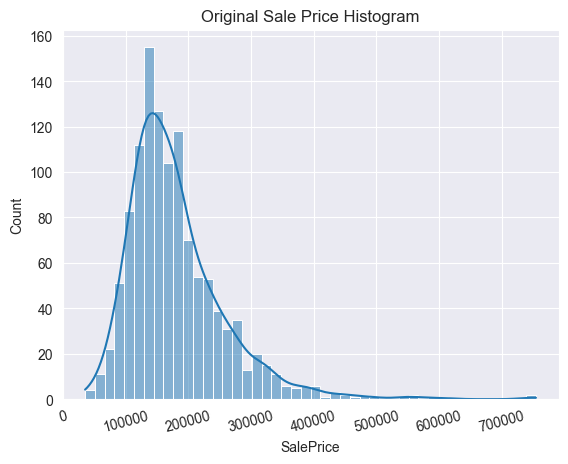

In [176]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(train_df['SalePrice'], kde=True)
plt.show()

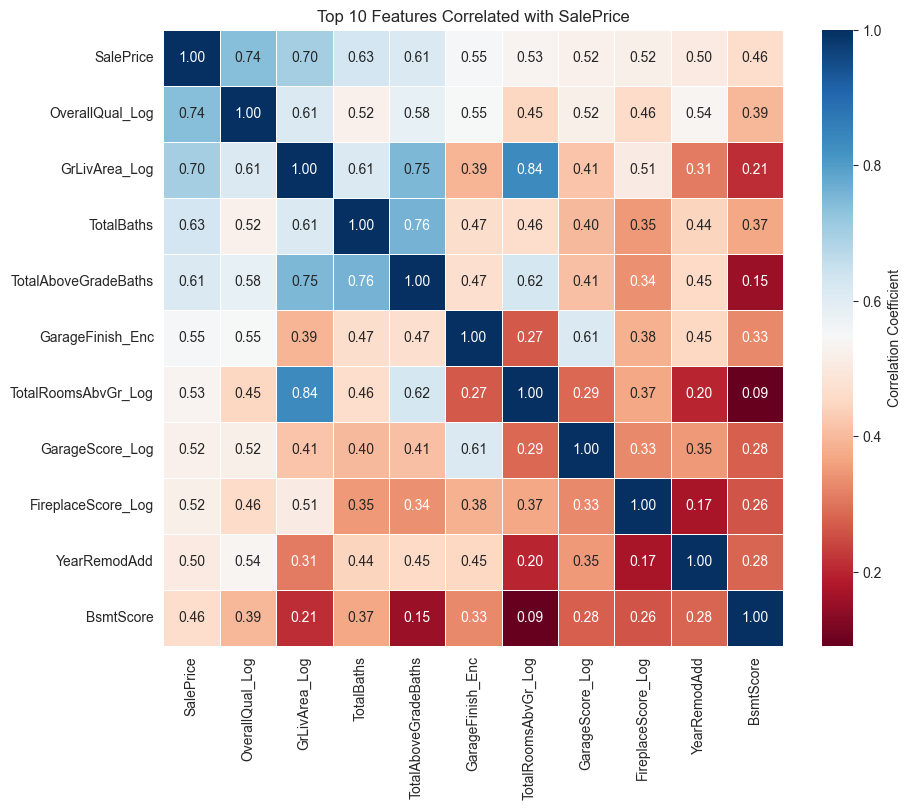

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_with_saleprice = house_df.corr()['SalePrice'].sort_values(ascending=False)

# 상위 N개(예: 10개) 특성 선택 (SalePrice 자기 자신 포함)
# SalePrice와의 상관관계가 높은 상위 11개 특성 이름을 가져옵니다.
N = 10
top_features = correlation_with_saleprice.head(N + 1).index.tolist()

# 선택된 특성들만으로 새로운 상관관계 행렬 생성
corr_subset = house_df[top_features].corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
# annot=True: 상관계수 값 표시, fmt='.2f': 소수점 2자리까지 표시
sns.heatmap(
    corr_subset,
    annot=True,
    fmt='.2f',
    cmap='RdBu',
    linewidths=.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title(f'Top {N} Features Correlated with SalePrice')
plt.show()

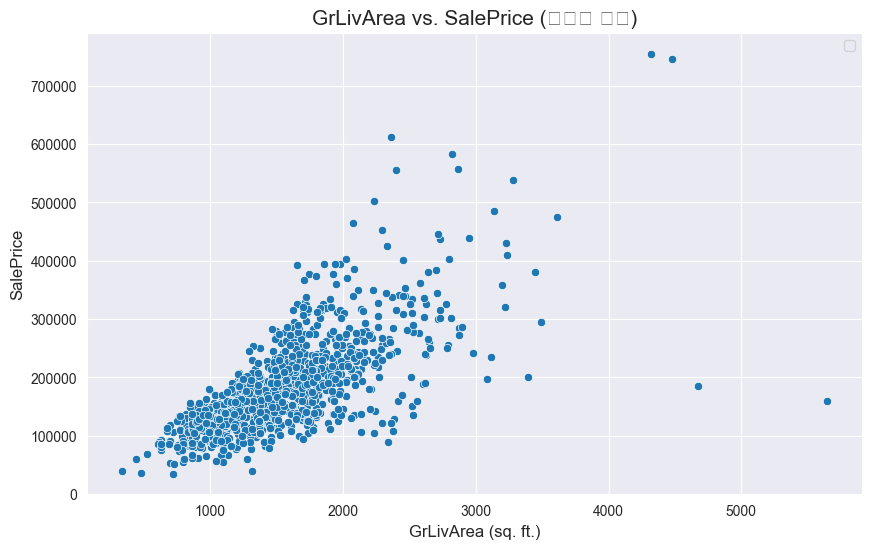

In [178]:
# --- 이상치(Outlier) 시각적 확인 ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea vs. SalePrice (이상치 확인)', fontsize=15)
plt.xlabel('GrLivArea (sq. ft.)', fontsize=12)
plt.ylabel('SalePrice', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [179]:
outlier_indices = train_df[(train_df['GrLivArea'] > 4000) & (train_df['SalePrice'] < 300000)].index

house_df = house_df.drop(outlier_indices)


✅ 총 38개의 수치형 특성에 대한 분포를 시각화합니다.


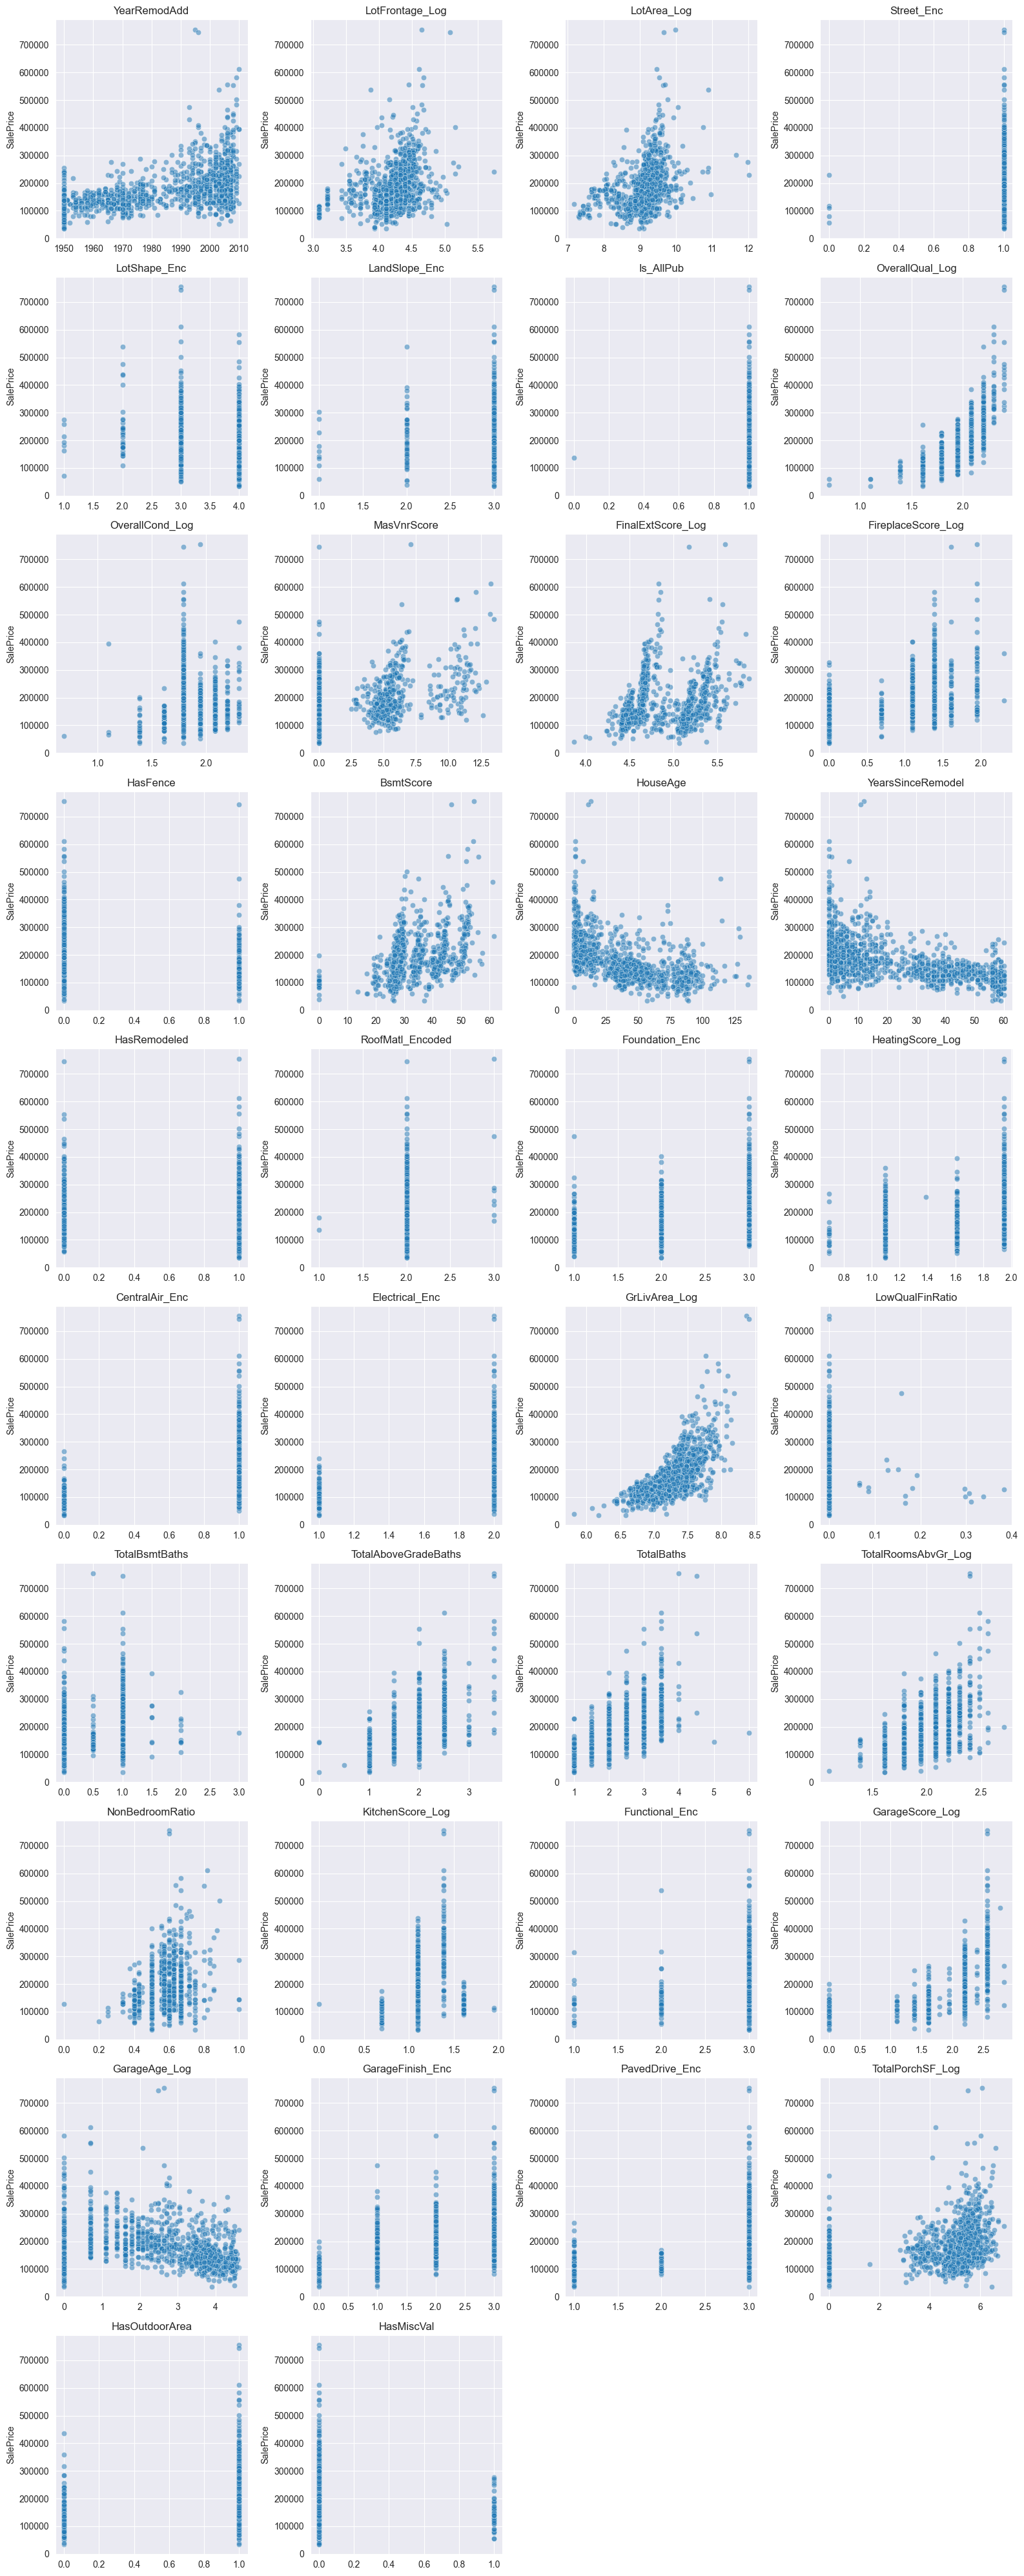

In [180]:
# ---  전체 수치형 특성에 대한 이상치 시각적 확인 ---

# 1. 원본 훈련 데이터에서 숫자형 특성만 선택
# (Id, SalePrice 및 이산적인 값들은 제외하고 의미있는 연속형/순서형 특성 위주로 선정)
numerical_features = house_df.select_dtypes(include=np.number)

# 분석에서 제외할 컬럼들 (ID, 월/년도 등 범주형에 가까운 숫자)
cols_to_exclude = ['Id', 'MSSubClass', 'MoSold', 'YrSold']
# SalePrice가 있는 경우에만 시각화에 포함
if 'SalePrice' in numerical_features.columns:
    cols_to_exclude.append('SalePrice')

features_to_plot = [col for col in numerical_features.columns if col not in cols_to_exclude]

# 2. 서브플롯(Subplot) 레이아웃 설정
n_features = len(features_to_plot)
n_cols = 4  # 한 줄에 4개의 그래프
n_rows = (n_features + n_cols - 1) // n_cols  # 필요한 행의 수

# 3. 전체 그래프 그리기
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, max(4, n_rows * 4)))
axes = axes.flatten()  # 2D 배열을 1D로 변환

print(f"✅ 총 {n_features}개의 수치형 특성에 대한 분포를 시각화합니다.")

for i, col in enumerate(features_to_plot):
    # SalePrice가 있는 경우와 없는 경우에 따라 시각화 방식 분기
    if 'SalePrice' in house_df.columns:
        sns.scatterplot(x=col, y='SalePrice', data=house_df, ax=axes[i], alpha=0.5)
        axes[i].set_ylabel('SalePrice')
    else:
        sns.histplot(house_df[col], ax=axes[i], kde=True)
        axes[i].set_ylabel('Count')

    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')

# 남는 빈 서브플롯 숨기기
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [181]:
#  타겟 변수(y)와 피처(X) 분리
y = np.log1p(house_df['SalePrice'])
X = house_df.drop('SalePrice', axis=1)

# 숫자형 데이터만 선택
X = X.select_dtypes(include=np.number)

# 무한대(inf) 값을 NaN으로 변환
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# NaN 값 확인 및 중앙값으로 대체
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())

In [182]:
import optuna
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

tuning_results_regression = {}


# RMSE 계산 헬퍼 함수
def get_rmse(y_true_log, y_pred_log):
   
    # 예측값이 무한대(inf)나 NaN인 경우 큰 페널티를 부여합니다.
    if not np.all(np.isfinite(y_pred_log)):
        return 1e8 # 매우 큰 오류 값 반환

    # np.sqrt()는 음수를 처리할 수 없으므로, 음수가 나오지 않도록 clip 처리
    mse = mean_squared_error(y_true_log, y_pred_log)
    return np.sqrt(mse)


# Optuna 시각화 헬퍼 함수
def visualize_tuning_results(study, model_name):
    
    print(f"\n--- {model_name} 튜닝 과정 시각화 ---")
    try:
        fig1 = optuna.visualization.plot_optimization_history(study)
        fig1.show()
    except Exception as e:
        print(f"최적화 과정 시각화 실패: {e}")

    try:
        fig2 = optuna.visualization.plot_param_importances(study)
        fig2.show()
    except Exception as e:
        print(f"파라미터 중요도 시각화 실패: {e}")

In [183]:

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

In [184]:
# --- Linear Regression 튜닝 (RobustScaler 사용) ---
from sklearn.preprocessing import RobustScaler
# 1. 튜닝 설정
MODEL_NAME = "Linear Regression"
N_TRIALS = 100
N_SPLITS = 7


# 2. Optuna Objective 함수 정의
def objective_linear_regression(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    model = Pipeline([
        ('scaler', RobustScaler()),
        ('linear_regression', LinearRegression(fit_intercept=fit_intercept, n_jobs=-1))
    ])

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        y_pred_log = model.predict(X_val)

       
        if not np.all(np.isfinite(y_pred_log)):
            return 1e8  

        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_linear_regression = optuna.create_study(direction="minimize")
study_linear_regression.optimize(
    objective_linear_regression,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_linear_regression.best_params
best_value = study_linear_regression.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_linear_regression}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_linear_regression, MODEL_NAME)

[I 2025-11-13 11:36:59,010] A new study created in memory with name: no-name-54a66661-6924-4413-b73b-a10409779c6d


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-13 11:36:59,121] Trial 0 finished with value: 3.805309495467998 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 3.805309495467998.
[I 2025-11-13 11:36:59,207] Trial 1 finished with value: 0.13705313605736077 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 0.13705313605736077.
[I 2025-11-13 11:36:59,289] Trial 2 finished with value: 3.805309495467998 and parameters: {'fit_intercept': False}. Best is trial 1 with value: 0.13705313605736077.
[I 2025-11-13 11:36:59,381] Trial 3 finished with value: 3.805309495467998 and parameters: {'fit_intercept': False}. Best is trial 1 with value: 0.13705313605736077.
[I 2025-11-13 11:36:59,461] Trial 4 finished with value: 0.13705313605736077 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 0.13705313605736077.
[I 2025-11-13 11:36:59,549] Trial 5 finished with value: 0.13705313605736077 and parameters: {'fit_intercept': True}. Best is trial 1 with value: 0.13705313605736077.
[I 

In [185]:
# --- Ridge Regression 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Ridge"
N_TRIALS = 100 
N_SPLITS = 7  

# 2. Optuna Objective 함수 정의
def objective_ridge(trial):
    
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e4)

    
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=alpha, random_state=42))
    ])

    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

       
        y_pred_log = model.predict(X_val)

       
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    
    return np.mean(scores)

# 3. 튜닝 실행

study_ridge = optuna.create_study(direction="minimize")
study_ridge.optimize(
    objective_ridge,
    n_trials=N_TRIALS,
    show_progress_bar=True 
)

# 4. 결과 저장 및 시각화
best_params = study_ridge.best_params
best_value = study_ridge.best_value
tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_ridge}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_ridge, MODEL_NAME)

[I 2025-11-13 11:37:09,883] A new study created in memory with name: no-name-f13ed4f0-32a2-40d3-8fe3-5e73061be8f8


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-13 11:37:09,936] Trial 0 finished with value: 0.14068408406456842 and parameters: {'alpha': 186.58526123677777}. Best is trial 0 with value: 0.14068408406456842.
[I 2025-11-13 11:37:09,981] Trial 1 finished with value: 0.1370174921050544 and parameters: {'alpha': 0.6318714862464724}. Best is trial 1 with value: 0.1370174921050544.
[I 2025-11-13 11:37:10,028] Trial 2 finished with value: 0.13705287810329322 and parameters: {'alpha': 0.0036624047416244296}. Best is trial 1 with value: 0.1370174921050544.
[I 2025-11-13 11:37:10,071] Trial 3 finished with value: 0.13705256915650194 and parameters: {'alpha': 0.00806383337889958}. Best is trial 1 with value: 0.1370174921050544.
[I 2025-11-13 11:37:10,108] Trial 4 finished with value: 0.1372971325213227 and parameters: {'alpha': 42.36300057804799}. Best is trial 1 with value: 0.1370174921050544.
[I 2025-11-13 11:37:10,150] Trial 5 finished with value: 0.16050793532814045 and parameters: {'alpha': 1277.873626414437}. Best is trial 1

In [186]:
# --- Lasso Regression 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Lasso"
N_TRIALS = 100  
N_SPLITS = 7 


# 2. Optuna Objective 함수 정의
def objective_lasso(trial):
    
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e4)

   
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(alpha=alpha, random_state=42, max_iter=2000))  # max_iter를 늘려 수렴 보장
    ])

    # --- 교차 검증 루프 ---    
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

   
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

       
        y_pred_log = model.predict(X_val)

        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)
   
    return np.mean(scores)


# 3. 튜닝 실행

study_lasso = optuna.create_study(direction="minimize")
study_lasso.optimize(
    objective_lasso,
    n_trials=N_TRIALS,
    show_progress_bar=True  
)

# 4. 결과 저장 및 시각화
best_params = study_lasso.best_params
best_value = study_lasso.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_lasso}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_lasso, MODEL_NAME)


[I 2025-11-13 11:37:14,516] A new study created in memory with name: no-name-08afe3af-fa5f-48bb-bb95-77cec3590d44


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-13 11:37:14,577] Trial 0 finished with value: 0.39875477457310193 and parameters: {'alpha': 63.25756491424959}. Best is trial 0 with value: 0.39875477457310193.
[I 2025-11-13 11:37:14,638] Trial 1 finished with value: 0.2520927406227999 and parameters: {'alpha': 0.1425226350407576}. Best is trial 1 with value: 0.2520927406227999.
[I 2025-11-13 11:37:14,681] Trial 2 finished with value: 0.39875477457310193 and parameters: {'alpha': 2500.951755401116}. Best is trial 1 with value: 0.2520927406227999.
[I 2025-11-13 11:37:14,726] Trial 3 finished with value: 0.39875477457310193 and parameters: {'alpha': 2.0482050342245497}. Best is trial 1 with value: 0.2520927406227999.
[I 2025-11-13 11:37:14,769] Trial 4 finished with value: 0.18479718264414924 and parameters: {'alpha': 0.06638832738711427}. Best is trial 4 with value: 0.18479718264414924.
[I 2025-11-13 11:37:14,838] Trial 5 finished with value: 0.13691603114655096 and parameters: {'alpha': 0.00036905598148003925}. Best is tria

In [187]:
# --- Elastic Net 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Elastic Net"
N_TRIALS = 1000  
N_SPLITS = 7 


# 2. Optuna Objective 함수 정의
def objective_elasticnet(trial):
    
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
    l1_ratio = trial.suggest_uniform('l1_ratio', 0.0, 1.0)  

    # 모델을 StandardScaler와 함께 파이프라인으로 구성합니다.
    model = Pipeline([
        ('scaler', RobustScaler()), 
        ('elasticnet', ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42, max_iter=2000))
    ])

    # --- 교차 검증 루프 ---    
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

       
        y_pred_log = model.predict(X_val)

        
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    
    return np.mean(scores)


# 3. 튜닝 실행

study_elasticnet = optuna.create_study(direction="minimize")
study_elasticnet.optimize(
    objective_elasticnet,
    n_trials=N_TRIALS,
    show_progress_bar=True 
)

# 4. 결과 저장 및 시각화
best_params = study_elasticnet.best_params
best_value = study_elasticnet.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_elasticnet}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_elasticnet, MODEL_NAME)

[I 2025-11-13 11:37:21,081] A new study created in memory with name: no-name-32d4bf60-c9f9-418a-9df8-b935ae62fba3


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2025-11-13 11:37:21,172] Trial 0 finished with value: 0.1380231410420034 and parameters: {'alpha': 0.001943908752063488, 'l1_ratio': 0.6567238406895384}. Best is trial 0 with value: 0.1380231410420034.
[I 2025-11-13 11:37:21,241] Trial 1 finished with value: 0.20454689247834068 and parameters: {'alpha': 0.42926774939802154, 'l1_ratio': 0.11180124647166256}. Best is trial 0 with value: 0.1380231410420034.
[I 2025-11-13 11:37:21,314] Trial 2 finished with value: 0.1452419767668971 and parameters: {'alpha': 0.01959555750338406, 'l1_ratio': 0.4947286806733575}. Best is trial 0 with value: 0.1380231410420034.
[I 2025-11-13 11:37:21,393] Trial 3 finished with value: 0.13749258522283045 and parameters: {'alpha': 0.003318433300827853, 'l1_ratio': 0.25479687204711}. Best is trial 3 with value: 0.13749258522283045.
[I 2025-11-13 11:37:21,479] Trial 4 finished with value: 0.13708337064666107 and parameters: {'alpha': 0.000989892658843389, 'l1_ratio': 0.4207591746567001}. Best is trial 4 with v

In [188]:
# --- Decision Tree Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Decision Tree"
N_TRIALS = 50 
N_SPLITS = 5  


# 2. Optuna Objective 함수 정의
def objective_decision_tree(trial):
    
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    
    model = DecisionTreeRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # --- 교차 검증 루프 ---
    
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

       
        y_pred_log = model.predict(X_val)

        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    
    return np.mean(scores)


# 3. 튜닝 실행

study_decision_tree = optuna.create_study(direction="minimize")
study_decision_tree.optimize(
    objective_decision_tree,
    n_trials=N_TRIALS,
    show_progress_bar=True  
)

# 4. 결과 저장 및 시각화
best_params = study_decision_tree.best_params
best_value = study_decision_tree.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_decision_tree}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")


visualize_tuning_results(study_decision_tree, MODEL_NAME)

[I 2025-11-13 11:39:26,423] A new study created in memory with name: no-name-f10f6473-2968-4ddc-912d-e4d2574af3c0


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-13 11:39:26,488] Trial 0 finished with value: 0.19419451241686736 and parameters: {'max_depth': 18, 'min_samples_split': 19, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.19419451241686736.
[I 2025-11-13 11:39:26,547] Trial 1 finished with value: 0.19378415039529384 and parameters: {'max_depth': 13, 'min_samples_split': 20, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.19378415039529384.
[I 2025-11-13 11:39:26,614] Trial 2 finished with value: 0.20705269986830124 and parameters: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.19378415039529384.
[I 2025-11-13 11:39:26,647] Trial 3 finished with value: 0.19958061897213725 and parameters: {'max_depth': 5, 'min_samples_split': 13, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.19378415039529384.
[I 2025-11-13 11:39:26,698] Trial 4 finished with value: 0.19570180034385748 and parameters: {'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 4}. Best 

In [189]:
# --- Random Forest Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Random Forest"
N_TRIALS = 50  
N_SPLITS = 5  


# 2. Optuna Objective 함수 정의
def objective_random_forest(trial):
    # 하이퍼파라미터 탐색 공간을 정의합니다.
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 5, 25)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.6, 0.8, 1.0])

    # Random Forest Regressor 모델을 생성합니다.
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1 
    )

    # --- 교차 검증 루프 ---
    
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        y_pred_log = model.predict(X_val)

        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_random_forest = optuna.create_study(direction="minimize")
study_random_forest.optimize(
    objective_random_forest,
    n_trials=N_TRIALS,
    show_progress_bar=True  
)

# 4. 결과 저장 및 시각화
best_params = study_random_forest.best_params
best_value = study_random_forest.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_random_forest}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_random_forest, MODEL_NAME)

[I 2025-11-13 11:39:29,795] A new study created in memory with name: no-name-9e8165dc-de21-4b9c-a416-274919cb3fb6


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-13 11:39:31,695] Trial 0 finished with value: 0.14719085839700696 and parameters: {'n_estimators': 261, 'max_depth': 23, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 1.0}. Best is trial 0 with value: 0.14719085839700696.
[I 2025-11-13 11:39:33,168] Trial 1 finished with value: 0.14242482690394537 and parameters: {'n_estimators': 259, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.14242482690394537.
[I 2025-11-13 11:39:33,776] Trial 2 finished with value: 0.14107462766798634 and parameters: {'n_estimators': 64, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.6}. Best is trial 2 with value: 0.14107462766798634.
[I 2025-11-13 11:39:35,330] Trial 3 finished with value: 0.14699467266952265 and parameters: {'n_estimators': 269, 'max_depth': 25, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.14107462766798

In [190]:
# --- Gradient Boosting Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "Gradient Boosting"
N_TRIALS = 50 
N_SPLITS = 5  


# 2. Optuna Objective 함수 정의
def objective_gradient_boosting(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)  # 각 트리 학습에 사용할 샘플 비율
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # 각 트리 학습에 사용할 특성 비율

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        max_features=max_features,
        random_state=42,
        n_iter_no_change=50,  
        validation_fraction=0.1,
        tol=1e-4 
    )

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)

        y_pred_log = model.predict(X_val)

        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_gradient_boosting = optuna.create_study(direction="minimize")
study_gradient_boosting.optimize(
    objective_gradient_boosting,
    n_trials=N_TRIALS,
    show_progress_bar=True  
)

# 4. 결과 저장 및 시각화
best_params = study_gradient_boosting.best_params
best_value = study_gradient_boosting.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value,
                                         'study': study_gradient_boosting}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_gradient_boosting, MODEL_NAME)

[I 2025-11-13 11:41:03,361] A new study created in memory with name: no-name-7e654018-e30b-4938-b649-e7388ce8eb86


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-13 11:41:04,852] Trial 0 finished with value: 0.13029988013673396 and parameters: {'n_estimators': 895, 'learning_rate': 0.03374526561837122, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 3, 'subsample': 0.7113318947538536, 'max_features': 'log2'}. Best is trial 0 with value: 0.13029988013673396.
[I 2025-11-13 11:41:07,261] Trial 1 finished with value: 0.14276192066656654 and parameters: {'n_estimators': 227, 'learning_rate': 0.011182673190834104, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 1, 'subsample': 0.8031799659304045, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.13029988013673396.
[I 2025-11-13 11:41:08,962] Trial 2 finished with value: 0.13132444143993102 and parameters: {'n_estimators': 430, 'learning_rate': 0.04308820063563711, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 4, 'subsample': 0.9687450365528891, 'max_features': 'log2'}. Best is trial 0 with value: 0.13029988013673396.
[I 2025-11-13 11:41:09,915] Tr

In [191]:
# --- LightGBM Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "LightGBM"
N_TRIALS = 20 
N_SPLITS = 5  


# 2. Optuna Objective 함수 정의
def objective_lightgbm(trial):
    param = {
        'objective': 'regression_l1', 
        'metric': 'rmse', 
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0), 
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),  
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,  
        'device': 'gpu' 
    }

    model = lgb.LGBMRegressor(**param)

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  eval_metric='rmse',  
                  callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])  # 50라운드 동안 성능 향상 없으면 조기 종료

        y_pred_log = model.predict(X_val)
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_lightgbm = optuna.create_study(direction="minimize")
study_lightgbm.optimize(
    objective_lightgbm,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_lightgbm.best_params
best_value = study_lightgbm.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_lightgbm}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_lightgbm, MODEL_NAME)

[I 2025-11-13 11:43:07,158] A new study created in memory with name: no-name-e6095011-2056-4a2f-9ff9-43efedda7b64


  0%|          | 0/20 [00:00<?, ?it/s]

[I 2025-11-13 11:43:14,760] Trial 0 finished with value: 0.17251117945496852 and parameters: {'n_estimators': 163, 'learning_rate': 0.015122833594623611, 'num_leaves': 25, 'max_depth': 6, 'min_child_samples': 27, 'subsample': 0.6238736501837847, 'colsample_bytree': 0.8091021084147845, 'reg_alpha': 0.0017709541376548195, 'reg_lambda': 0.09311430234519037}. Best is trial 0 with value: 0.17251117945496852.
[I 2025-11-13 11:43:25,568] Trial 1 finished with value: 0.15356383378993055 and parameters: {'n_estimators': 441, 'learning_rate': 0.011919368347629905, 'num_leaves': 81, 'max_depth': 10, 'min_child_samples': 61, 'subsample': 0.7123550350356052, 'colsample_bytree': 0.6645184480888913, 'reg_alpha': 0.003745020690863665, 'reg_lambda': 1.0001218301298453}. Best is trial 1 with value: 0.15356383378993055.
[I 2025-11-13 11:43:37,413] Trial 2 finished with value: 0.13544515613544147 and parameters: {'n_estimators': 342, 'learning_rate': 0.16868040366144582, 'num_leaves': 89, 'max_depth': 13,

In [192]:
# --- CatBoost Regressor 튜닝 ---

# 1. 튜닝 설정
MODEL_NAME = "CatBoost"
N_TRIALS = 25  
N_SPLITS = 5  


# 2. Optuna Objective 함수 정의
def objective_catboost(trial):
    param = {
        'objective': 'RMSE', 
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'random_seed': 42,
        'verbose': 0,  
        'early_stopping_rounds': 50,  
        'task_type': 'GPU'
    }

    model = CatBoostRegressor(**param)

    # --- 교차 검증 루프 ---
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)
    scores = []

    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train,
                  eval_set=[(X_val, y_val)],
                  verbose=False) 

        y_pred_log = model.predict(X_val)
        rmse = get_rmse(y_val, y_pred_log)
        scores.append(rmse)

    return np.mean(scores)


# 3. 튜닝 실행
study_catboost = optuna.create_study(direction="minimize")
study_catboost.optimize(
    objective_catboost,
    n_trials=N_TRIALS,
    show_progress_bar=True
)

# 4. 결과 저장 및 시각화
best_params = study_catboost.best_params
best_value = study_catboost.best_value

tuning_results_regression[MODEL_NAME] = {'best_params': best_params, 'best_value': best_value, 'study': study_catboost}

print(f"\n--- 튜닝 완료: {MODEL_NAME} ---")
print(f"최적 하이퍼파라미터: {best_params}")
print(f"최소 평균 RMSE: {best_value:.4f}")

visualize_tuning_results(study_catboost, MODEL_NAME)

[I 2025-11-13 11:46:51,618] A new study created in memory with name: no-name-8fdaeca7-e49d-4469-a765-d9a35b00cfd0


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-11-13 11:47:05,870] Trial 0 finished with value: 0.13767716570106053 and parameters: {'iterations': 183, 'learning_rate': 0.08771185455655776, 'depth': 9, 'l2_leaf_reg': 0.04419682560025659}. Best is trial 0 with value: 0.13767716570106053.
[I 2025-11-13 11:48:34,728] Trial 1 finished with value: 0.13500961627856164 and parameters: {'iterations': 840, 'learning_rate': 0.025541083253088216, 'depth': 5, 'l2_leaf_reg': 7.785041281602092}. Best is trial 1 with value: 0.13500961627856164.
[I 2025-11-13 11:49:17,541] Trial 2 finished with value: 0.13416510969604628 and parameters: {'iterations': 618, 'learning_rate': 0.07476832811693367, 'depth': 6, 'l2_leaf_reg': 1.7300095312311223}. Best is trial 2 with value: 0.13416510969604628.
[I 2025-11-13 11:49:35,713] Trial 3 finished with value: 0.13260462863650588 and parameters: {'iterations': 762, 'learning_rate': 0.13256187603066444, 'depth': 4, 'l2_leaf_reg': 0.0018748013985297502}. Best is trial 3 with value: 0.13260462863650588.
[I 2


--- Optuna 튜닝을 통한 모델별 최종 RMSE 성능 (원본 SalePrice 스케일) ---
               Model  Best_RMSE
6  Gradient Boosting   0.128920
8           CatBoost   0.129850
7           LightGBM   0.133832
3        Elastic Net   0.136800
1              Ridge   0.136881
2              Lasso   0.136916
0  Linear Regression   0.137053
5      Random Forest   0.138993
4      Decision Tree   0.190608


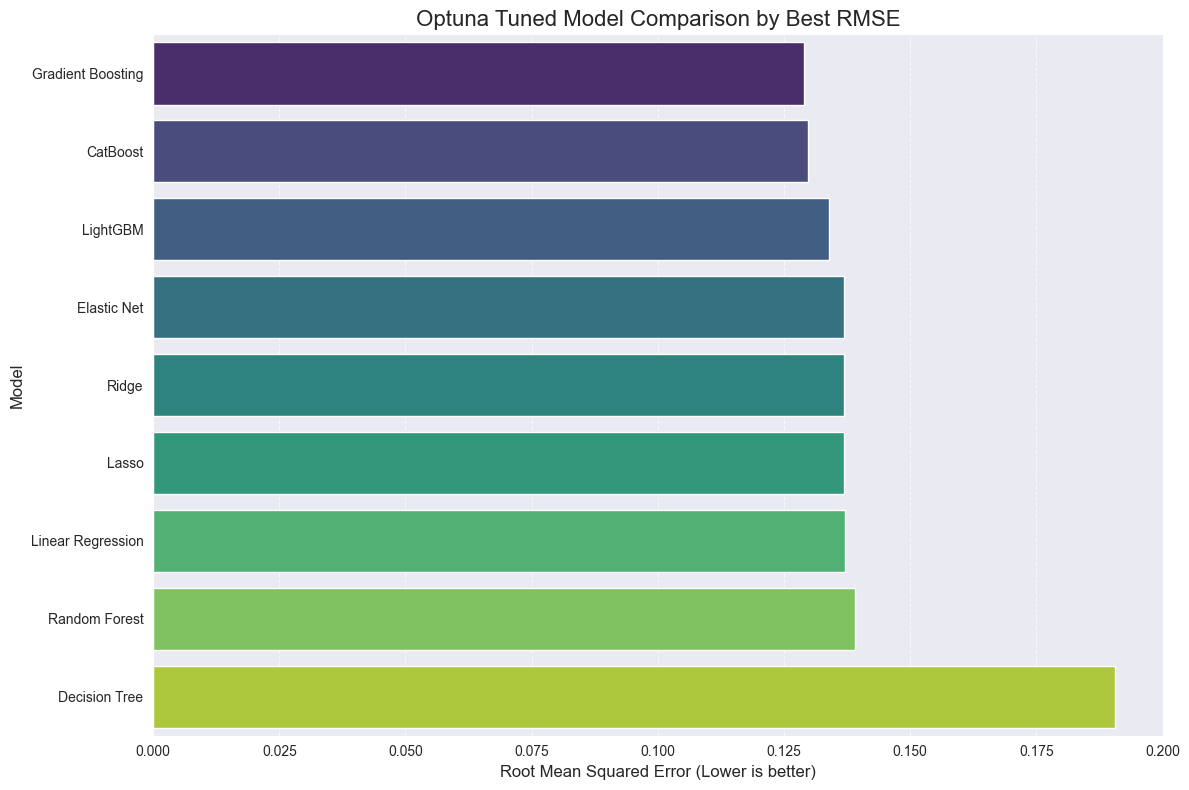


✅ 모든 모델의 Optuna 튜닝 및 최종 결과 비교 완료.


In [193]:
# --- 최종 튜닝 결과 비교 및 시각화 ---

# 1. 튜닝된 모델들의 RMSE 결과 수집
final_rmse_results = {}
for model_name, result in tuning_results_regression.items():
    final_rmse_results[model_name] = result['best_value']

# 2. 결과를 DataFrame으로 변환 및 정렬
results_df = pd.DataFrame(
    list(final_rmse_results.items()),
    columns=['Model', 'Best_RMSE']
).sort_values(by='Best_RMSE', ascending=True)

print("\n--- Optuna 튜닝을 통한 모델별 최종 RMSE 성능 (원본 SalePrice 스케일) ---")
print(results_df)

In [194]:
# --- 스태킹 앙상블 - Base Model OOF 예측 생성 (Level 1) ---

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np
import pandas as pd

print("✅ 스태킹 앙상블을 위한 Base Model OOF 예측 생성 시작.")

# 2. Base Model 선택 (전체 모델 중 상위 4개)
all_model_results = sorted(
    tuning_results_regression.items(),
    key=lambda item: item[1]['best_value']
)
# 2-2. 상위 4개 모델의 이름만 추출
selected_base_model_names = [name for name, _ in all_model_results[:4]]

print(f"\n선택된 Base Model (총 {len(selected_base_model_names)}개): {selected_base_model_names}")

# 3. 선택된 Base Model 인스턴스 생성
base_models_to_stack = {}
for model_name in selected_base_model_names:
    best_params = tuning_results_regression[model_name]['best_params']

    # 각 모델별로 최적 파라미터를 사용하여 모델 인스턴스 생성
    if model_name == "Linear Regression":
        model = Pipeline([('scaler', StandardScaler()),
                          ('model', LinearRegression(fit_intercept=best_params['fit_intercept'], n_jobs=-1))])
    elif model_name == "Ridge":
        model = Pipeline([('scaler', StandardScaler()), ('model', Ridge(alpha=best_params['alpha'], random_state=42))])
    elif model_name == "Lasso":
        model = Pipeline([('scaler', StandardScaler()),
                          ('model', Lasso(alpha=best_params['alpha'], random_state=42, max_iter=2000))])
    elif model_name == "Elastic Net":
        model = Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=best_params['alpha'],
                                                                             l1_ratio=best_params['l1_ratio'],
                                                                             random_state=42, max_iter=2000))])
    elif model_name == "Decision Tree":
        model = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
    elif model_name == "Random Forest":
        model = RandomForestRegressor(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                                      min_samples_split=best_params['min_samples_split'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      max_features=best_params['max_features'], random_state=42, n_jobs=-1)
    elif model_name == "Gradient Boosting":
        model = GradientBoostingRegressor(n_estimators=best_params['n_estimators'],
                                          learning_rate=best_params['learning_rate'],
                                          max_depth=best_params['max_depth'],
                                          min_samples_split=best_params['min_samples_split'],
                                          min_samples_leaf=best_params['min_samples_leaf'],
                                          subsample=best_params['subsample'], max_features=best_params['max_features'],
                                          random_state=42)
    elif model_name == "XGBoost":
        model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', booster=best_params['booster'],
                             reg_lambda=best_params['lambda'], reg_alpha=best_params['alpha'],  # <-- 이 부분 수정
                             colsample_bytree=best_params['colsample_bytree'], subsample=best_params['subsample'],
                             learning_rate=best_params['learning_rate'], n_estimators=best_params['n_estimators'],
                             max_depth=best_params['max_depth'], min_child_weight=best_params['min_child_weight'],
                             seed=42, n_jobs=-1, tree_method='hist', device='cuda')
    elif model_name == "LightGBM":
        model = LGBMRegressor(objective='regression_l1', metric='rmse', n_estimators=best_params['n_estimators'],
                              learning_rate=best_params['learning_rate'], num_leaves=best_params['num_leaves'],
                              max_depth=best_params['max_depth'], min_child_samples=best_params['min_child_samples'],
                              subsample=best_params['subsample'], colsample_bytree=best_params['colsample_bytree'],
                              reg_alpha=best_params['reg_alpha'], reg_lambda=best_params['reg_lambda'],
                              random_state=42, n_jobs=-1, verbose=-1, device='gpu')
    elif model_name == "CatBoost":
        model = CatBoostRegressor(objective='RMSE', iterations=best_params['iterations'],
                                  learning_rate=best_params['learning_rate'],
                                  depth=best_params['depth'], l2_leaf_reg=best_params['l2_leaf_reg'],
                                  random_seed=42, verbose=0, early_stopping_rounds=50, task_type='GPU')

    base_models_to_stack[model_name] = model

# 4. OOF 예측 생성 (기존 로직과 동일)
N_SPLITS_STACKING = 5  # 스태킹을 위한 K-Fold 수 (튜닝과 동일하게 유지)
kf_stacking = KFold(n_splits=N_SPLITS_STACKING, shuffle=True, random_state=42)

# 메타 모델의 훈련 데이터가 될 OOF 예측값을 저장할 DataFrame
X_meta_train = pd.DataFrame(index=X.index)

print(f"\n{len(base_models_to_stack)}개의 Base Model OOF 예측 생성 중...")

for name, model in base_models_to_stack.items():
    print(f"-> {name} 모델 OOF 예측 생성...")
    oof_preds_for_model = np.zeros(len(X))  # 현재 모델의 OOF 예측을 저장할 배열

    for fold, (train_idx, val_idx) in enumerate(kf_stacking.split(X, y)):
        X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
        y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

        # 모델 학습 (XGBoost, LightGBM, CatBoost는 eval_set과 early_stopping_rounds를 사용)
        if name == "XGBoost":
            model.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_val_fold, y_val_fold)],
                      early_stopping_rounds=50, verbose=False)
        elif name == "LightGBM":
            model.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_val_fold, y_val_fold)],
                      eval_metric='rmse',
                      callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])
        elif name == "CatBoost":
            model.fit(X_train_fold, y_train_fold,
                      eval_set=[(X_val_fold, y_val_fold)],
                      verbose=False)
        else:
            model.fit(X_train_fold, y_train_fold)

        # 검증 폴드에 대한 예측 저장
        oof_preds_for_model[val_idx] = model.predict(X_val_fold)

    X_meta_train[f'{name}_pred'] = oof_preds_for_model

print("\n✅ Base Model OOF 예측 생성 완료!")
print(f"메타 모델 훈련 데이터 (X_meta_train) shape: {X_meta_train.shape}")

✅ 스태킹 앙상블을 위한 Base Model OOF 예측 생성 시작.

선택된 Base Model (총 4개): ['Gradient Boosting', 'CatBoost', 'LightGBM', 'Elastic Net']

4개의 Base Model OOF 예측 생성 중...
-> Gradient Boosting 모델 OOF 예측 생성...
-> CatBoost 모델 OOF 예측 생성...
-> LightGBM 모델 OOF 예측 생성...
-> Elastic Net 모델 OOF 예측 생성...

✅ Base Model OOF 예측 생성 완료!
메타 모델 훈련 데이터 (X_meta_train) shape: (1166, 4)


In [195]:
# --- 스태킹 앙상블 - Meta Model 학습 및 평가 (Level 2) ---

# 1. 필요한 라이브러리 임포트
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

print("✅ 스태킹 앙상블 Meta Model 학습 및 평가 시작.")

# 2. 메타 모델 정의
meta_model = LinearRegression(n_jobs=-1)

y_meta_train = y.loc[X_meta_train.index]

# 3. 메타 모델 학습 및 교차 검증 평가
N_SPLITS_META = 5
kf_meta = KFold(n_splits=N_SPLITS_META, shuffle=True, random_state=42)

meta_model_rmses = []

print(f"\nMeta Model ({type(meta_model).__name__}) 교차 검증 시작...")

for fold, (train_idx, val_idx) in enumerate(kf_meta.split(X_meta_train, y_meta_train)):
    X_meta_train_fold, X_meta_val_fold = X_meta_train.iloc[train_idx], X_meta_train.iloc[val_idx]
    y_meta_train_fold, y_meta_val_fold = y_meta_train.iloc[train_idx], y_meta_train.iloc[val_idx]

    meta_model.fit(X_meta_train_fold, y_meta_train_fold)

    y_meta_pred_log = meta_model.predict(X_meta_val_fold)

    rmse = get_rmse(y_meta_val_fold, y_meta_pred_log)
    meta_model_rmses.append(rmse)
    print(f"  Fold {fold + 1} RMSE: {rmse:.4f}")

final_stacking_rmse = np.mean(meta_model_rmses)
final_stacking_rmse_std = np.std(meta_model_rmses)

print("\n--- 스태킹 앙상블 최종 성능 ---")
print(f"평균 RMSE: {final_stacking_rmse:.4f}")
print(f"RMSE 표준편차: {final_stacking_rmse_std:.4f}")

# 최종 결과 딕셔너리에 스태킹 앙상블 결과 추가
tuning_results_regression['Stacking Ensemble'] = {
    'best_params': 'N/A',
    'best_value': final_stacking_rmse,
    'study': 'N/A'
}

print("\n✅ 스태킹 앙상블 Meta Model 학습 및 평가 완료.")
print("최종 결과 비교를 위해 101번 셀을 다시 실행하여 업데이트된 그래프를 확인하세요.")

✅ 스태킹 앙상블 Meta Model 학습 및 평가 시작.

Meta Model (LinearRegression) 교차 검증 시작...
  Fold 1 RMSE: 0.1195
  Fold 2 RMSE: 0.1149
  Fold 3 RMSE: 0.1336
  Fold 4 RMSE: 0.1116
  Fold 5 RMSE: 0.1388

--- 스태킹 앙상블 최종 성능 ---
평균 RMSE: 0.1237
RMSE 표준편차: 0.0107

✅ 스태킹 앙상블 Meta Model 학습 및 평가 완료.
최종 결과 비교를 위해 101번 셀을 다시 실행하여 업데이트된 그래프를 확인하세요.
